## import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Create new feature (Risky/Good)

In [3]:
fraud_check['Risky/Good'] = fraud_check['Taxable.Income']

In [4]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky/Good
0,NO,Single,68833,50047,10,YES,68833
1,YES,Divorced,33700,134075,18,YES,33700
2,NO,Married,36925,160205,30,YES,36925
3,YES,Single,50190,193264,15,YES,50190
4,NO,Married,81002,27533,28,NO,81002
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,76340
596,YES,Divorced,69967,55369,2,YES,69967
597,NO,Divorced,47334,154058,0,YES,47334
598,YES,Married,98592,180083,17,NO,98592


In [5]:
fraud_check['Risky/Good'] = fraud_check['Risky/Good'].apply(lambda x:'Risky' if x<=30000 else 'Good')

In [6]:
fraud_check.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky/Good
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


## Data understanding

In [7]:
fraud_check.shape

(600, 7)

In [8]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Risky/Good         0
dtype: int64

In [9]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Risky/Good         object
dtype: object

In [10]:
fraud_check.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [11]:
del fraud_check['Taxable.Income']

In [12]:
fraud_check2 = fraud_check.copy()

## Label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
fraud_check2['Undergrad']      = le.fit_transform(fraud_check2['Undergrad'])
fraud_check2['Marital_Status'] = le.fit_transform(fraud_check2['Marital_Status'])
fraud_check2['Urban']          = le.fit_transform(fraud_check2['Urban'])
fraud_check2['Risky/Good']     = le.fit_transform(fraud_check2['Risky/Good'])

In [15]:
fraud_check2.dtypes

Undergrad          int64
Marital_Status     int64
City_Population    int64
Work_Experience    int64
Urban              int64
Risky/Good         int64
dtype: object

In [16]:
X = fraud_check2.drop('Risky/Good',axis=1)
y= fraud_check2[['Risky/Good']]

## Standard Scalar

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()
scaled_X = std.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)

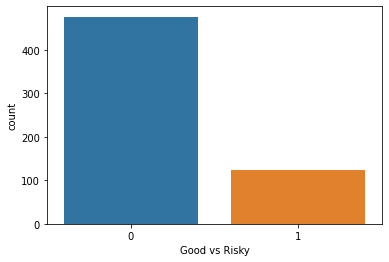

In [19]:
sns.countplot(x='Risky/Good',data=fraud_check2)
plt.xlabel('Good vs Risky')
plt.show()

### Observation

#### output data is imbalance

## Spliting data 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [22]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [23]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

## Model Training | Testing | Evaluation

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,plot_confusion_matrix

accuracy score          : 0.6167
precision score         : 0.1818
recall score            : 0.24


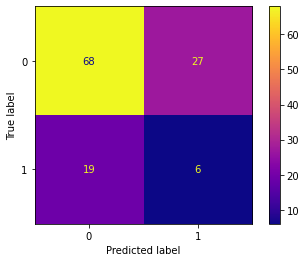

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
plot_confusion_matrix(dt_model,X_test,y_test,cmap='plasma')
plt.show()

## Tune Decision tree using gridsearch cv

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_cv = GridSearchCV(estimator=dt_model,param_grid={
    "criterion":["gini", "entropy"],
    "max_depth":range(3,11)
})
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11)})

In [28]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

accuracy score          : 0.775
precision score         : 0.25
recall score            : 0.04


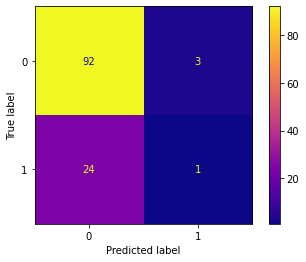

In [31]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=3,class_weight={1:3},random_state=12)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
plot_confusion_matrix(dt_model,X_test,y_test,cmap='plasma')
plt.show()

## Conclusion

### We get 77% accuracy

## ===========================        End      ==================================